<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [39]:
from itertools import groupby

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from gradio.themes.builder_app import palette_range
from rich.jupyter import display
from soupsieve.util import lower
import math

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла.

In [66]:
hh = pd.read_csv("dst-3.0_16_1_hh_database.csv",
                 encoding="utf-8",
                 sep=";")

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [67]:
hh.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [69]:
hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [70]:
hh.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 2014 Тюменский Государствен...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [71]:
hh["Образование"] = (hh["Образование и ВУЗ"]
                     .apply(lambda x:
                     x.split(" образование")[0].lower())) # Преобразование нового столбца

hh.drop(["Образование и ВУЗ"], axis=1, inplace=True)
hh["Образование"].unique()

array(['неоконченное высшее', 'высшее', 'среднее специальное', 'среднее'],
      dtype=object)

In [72]:
hh["Образование"].value_counts()

Образование
высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: count, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина.
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '.
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [73]:
hh["Пол"] = (hh["Пол, возраст"]
             .apply(lambda x: x.split(",")[0][:1])) # Преобразование нового столбца

hh["Возраст"] = (hh["Пол, возраст"]
                 .apply(lambda x: int(x.split()[2])))

hh.drop(["Пол, возраст"], axis=1, inplace=True)
hh.head()

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [74]:
hh["Опыт работы (месяц)"] = (hh["Опыт работы"]
                             .apply(lambda x:
                             None if x == "NaN" or x == "Не указано" or isinstance(x, float)
                             else int(str(x).split()[2]) if str(x).split()[3] in ["месяцев", "месяца"]
                             else int(str(x).split()[2]) * 12 + int(str(x).split()[4]) if str(x).split()[5] in ["месяцев", "месяца"]
                             else int(str(x).split()[2]) * 12)) # Преобразование нового столбца
hh.drop(["Опыт работы"], axis=1, inplace=True)
hh.head()

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц)
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38,225.0
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26,67.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [75]:
million_cities = ['Новосибирск',
                  'Екатеринбург',
                  'Нижний Новгород',
                  'Казань',
                  'Челябинск',
                  'Омск',
                  'Самара',
                  'Ростов-на-Дону',
                  'Уфа',
                  'Красноярск',
                  'Пермь',
                  'Воронеж',
                  'Волгоград']

hh["Город"] = (hh["Город, переезд, командировки"]
               .apply(lambda x:
                x.split(" , ")[0] if x.split(" , ")[0] in ["Москва", "Санкт-Петербург"]
                else "город-миллионник" if x.split()[0] in million_cities
                else "другие")) # Преобразование нового столбца

hh["Готовность к переезду"] = (hh["Город, переезд, командировки"]
                               .apply(lambda x:
                               False if "не" in x.split(" , ")[-2]
                               else True)) # Преобразование нового столбца

hh["Готовность к командировкам"] = (hh["Город, переезд, командировки"]
                                    .apply(lambda x:
                                    False if ("командиров" not in x.split(" , ")[-1]) | ("не" in x.split(" , ")[-1])
                                    else True)) # Преобразование нового столбца

hh.drop(["Город, переезд, командировки"], axis=1, inplace=True)
hh.head()

,ЗП,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам
0,29000 руб.,Системный администратор,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,False,False
1,40000 руб.,Технический писатель,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0,другие,False,True
2,20000 руб.,Оператор,полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0,другие,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38,225.0,другие,False,True
4,140000 руб.,Региональный менеджер по продажам,полная занятость,полный день,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26,67.0,Москва,False,True


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [76]:
hh["Полная занятость"] = hh["Занятость"].apply(lambda x: "полная занятость" in x)

hh["Частичная занятость"] = hh["Занятость"].apply(lambda x: "частичная занятость" in x)

hh["Проектная работа"] = hh["Занятость"].apply(lambda x: "проектная работа" in x)

hh["Стажировка"] = hh["Занятость"].apply(lambda x: "стажировка" in x)

hh["Волонтерство"] = hh["Занятость"].apply(lambda x: "волонтерство" in x)

hh["Полный день"] = hh["График"].apply(lambda x: "полный день" in x)

hh["Сменный график"] = hh["График"].apply(lambda x: "сменный график" in x)

hh["Гибкий график"] = hh["График"].apply(lambda x: "гибкий график" in x)

hh["Удаленная работа"] = hh["График"].apply(lambda x: "удаленная работа" in x)

hh["Вахтовый метод"] = hh["График"].apply(lambda x: "вахтовый метод" in x)

hh.drop(["Занятость"], axis=1, inplace=True)
hh.drop(["График"], axis=1, inplace=True)
hh.head()

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,Полная занятость,Частичная занятость,Проектная работа,Стажировка,Волонтерство,Полный день,Сменный график,Гибкий график,Удаленная работа,Вахтовый метод
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,...,True,True,True,False,False,True,True,True,True,True
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0,...,True,True,True,False,False,True,True,True,True,False
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0,...,True,False,False,False,False,True,False,False,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38,225.0,...,True,True,True,False,False,False,False,True,True,False
4,140000 руб.,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26,67.0,...,True,False,False,False,False,True,False,False,False,False


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [77]:
ExchangeRate = pd.read_csv("ExchangeRates.csv")
ER = ExchangeRate[["currency", "date", "proportion", "close"]]
ER.loc[:, "date"] = pd.to_datetime(ER["date"], format="%d/%m/%y").dt.date # Извлекаем дату из столбца с датой
ER.head()

hh.loc[:, "Обновление резюме"] =  pd.to_datetime(
    hh["Обновление резюме"],
    format="%d.%m.%Y %H:%M"
).dt.date # Извлекаем дату из столбца с датой

# Перевод в стандарт ISO
ISO = {
    "руб.":"руб.",
    "грн.":"UAH",
    "USD":"USD",
    "EUR":"EUR",
    "бел.руб.":"BYN",
    "KGS":"KGS",
    "сум.":"UZS",
    "AZN":"AZN",
    "KZT":"KZT"
}

hh["Валюта"] = hh["ЗП"].apply(lambda x: x.split()[-1])
hh["Сумма"] = hh["ЗП"].apply(lambda x: float(x.split()[0]))
hh["Валюта"] = hh["Валюта"].map(ISO)

# Объединение таблиц
hh_new = pd.merge(
    hh,
    ER,
    left_on=["Обновление резюме", "Валюта"],
    right_on=["date", "currency"],
    how="left"
)

hh_new["close"] = hh_new["close"].fillna(1)
hh_new["proportion"] = hh_new["proportion"].fillna(1)
hh["ЗП (руб)"] = hh_new["Сумма"] * hh_new["close"] / hh_new["proportion"]
hh.drop(["Валюта","Сумма", "ЗП"], axis=1, inplace=True)
del hh_new
hh.head()

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,Частичная занятость,Проектная работа,Стажировка,Волонтерство,Полный день,Сменный график,Гибкий график,Удаленная работа,Вахтовый метод,ЗП (руб)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,...,True,True,False,False,True,True,True,True,True,29000.0
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,высшее,М,60,233.0,другие,...,True,True,False,False,True,True,True,True,False,40000.0
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,среднее специальное,Ж,36,123.0,другие,...,False,False,False,False,True,False,False,False,False,20000.0
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-04-08,Не указано,высшее,М,38,225.0,другие,...,True,True,False,False,False,False,True,True,False,100000.0
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,высшее,Ж,26,67.0,Москва,...,False,False,False,False,True,False,False,False,False,140000.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

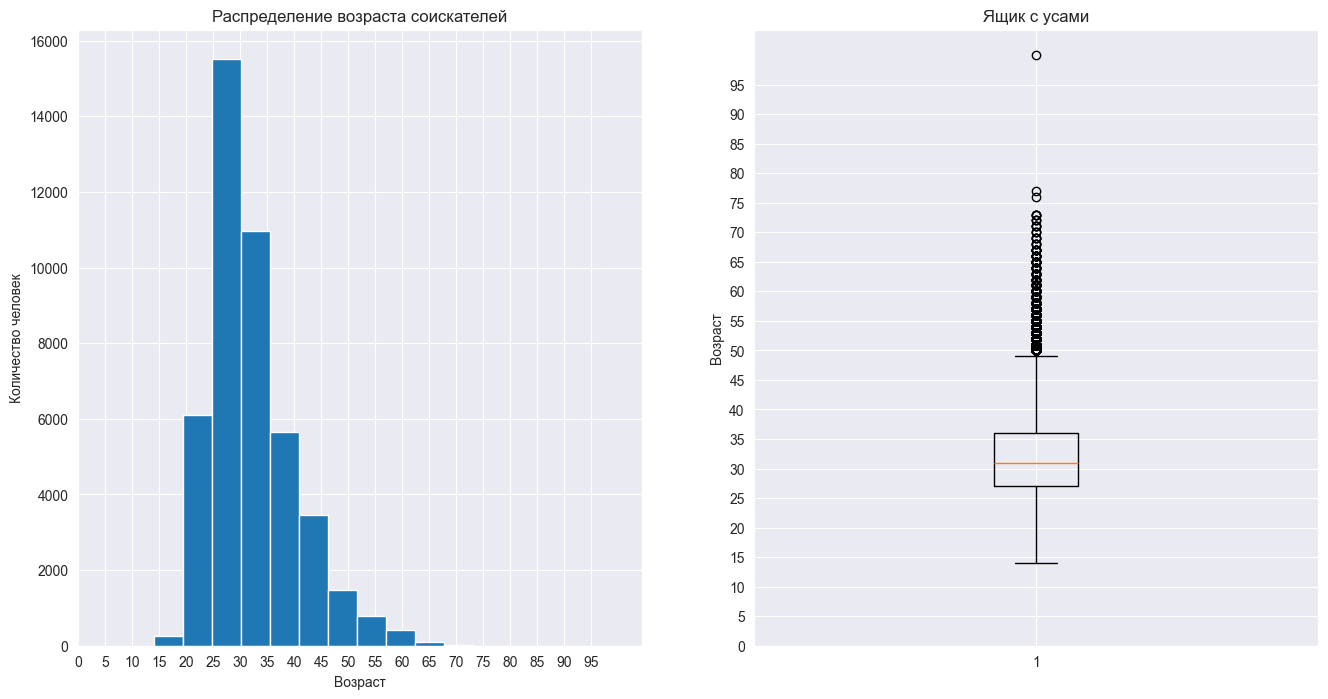

In [78]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

m = round(1 + math.log(len(hh), 2)) # Определение числа бинов по формуле Стерджеса

axs[0].hist(hh["Возраст"], bins=m)
axs[0].set_title("Распределение возраста соискателей")
axs[0].set_xlabel("Возраст")
axs[0].set_xticks(np.arange(0,100,5))
axs[0].set_ylabel("Количество человек")

axs[1].boxplot(hh["Возраст"])
axs[1].set_title("Ящик с усами")
axs[1].set_ylabel("Возраст")
axs[1].set_yticks(np.arange(0,100,5))

plt.show()

По гистограмме видно, что чаще всего резюме подают соискатели от 25 до 30 лет (мода равна 30 годам). Возраст большинства соискателей определяется межквартильным размахом, то есть примерно составляет от 27 до 37 лет. Предельные значения определяются размахом от $Q_1-1,5*(Q_3-Q_1)$ до $Q_3+1,5*(Q_3-Q_1)$, на графике это границы "усов" ящика, то есть от 14 до 48 лет, следовательно, всё, что лежит за границами, является выбросами (аномальными значениями). Распределение не сильно похоже на нормальное. Вообще, удивительно, что здесь есть соискатель, которому 100 лет:)

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

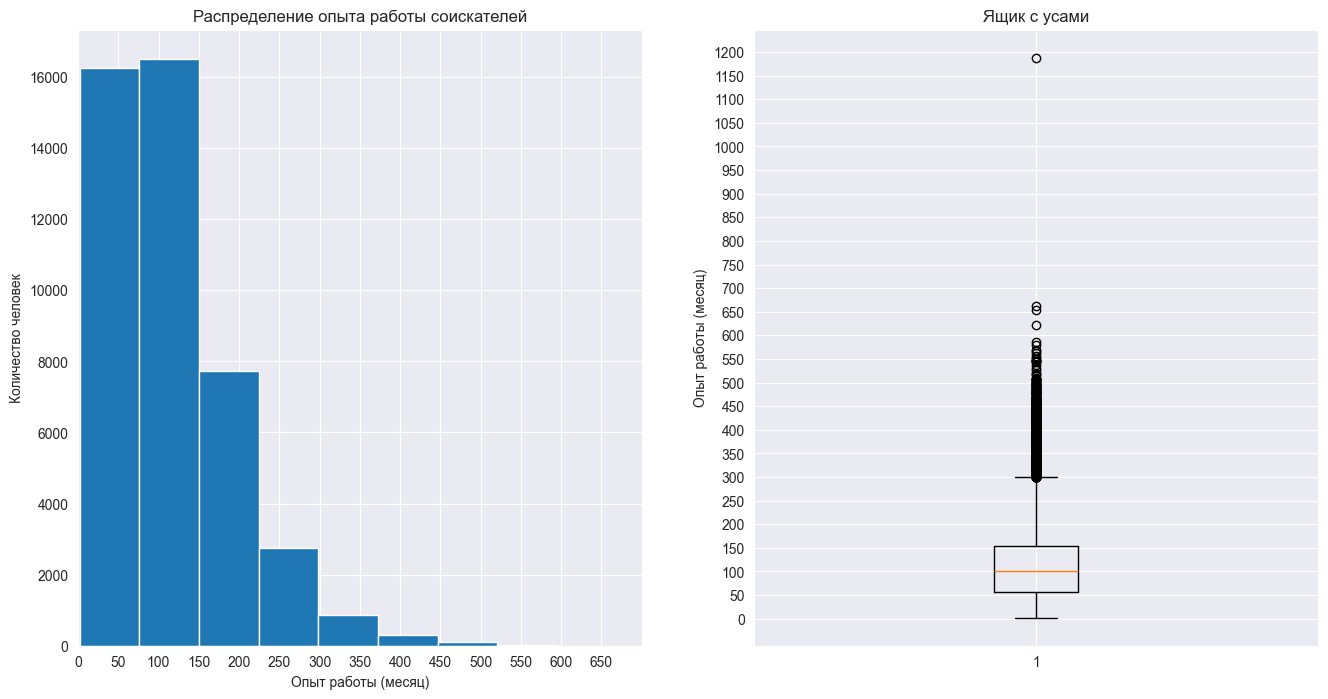

In [79]:
fig1, axs = plt.subplots(1, 2, figsize=(16, 8))

axs[0].hist(hh["Опыт работы (месяц)"].dropna().astype(int), bins=m)
axs[0].set_title("Распределение опыта работы соискателей")
axs[0].set_xlabel("Опыт работы (месяц)")
axs[0].set_xticks(np.arange(0, 700, 50))
axs[0].set_ylabel("Количество человек")
axs[0].set_xlim(0, 700)

axs[1].boxplot(hh["Опыт работы (месяц)"].dropna().astype(int))
axs[1].set_title("Ящик с усами")
axs[1].set_ylabel("Опыт работы (месяц)")
axs[1].set_yticks(np.arange(0, hh["Опыт работы (месяц)"].max() + 50, 50))

plt.show()

По гистограмме видно, что чаще всего резюме подают соискатели с опытом работы от 70 до 150 месяцев (мода равна 96 месяцам). Опыт большинства соискателей определяется межквартильным размахом, то есть примерно составляет от 55 до 155 месяцев. Предельные значения определяются размахом от $Q_1-1,5*(Q_3-Q_1)$ до $Q_3+1,5*(Q_3-Q_1)$, на графике это границы "усов" ящика, то есть от 0 до 300 месяцев, следовательно, всё, что лежит за границами, является выбросами (аномальными значениями). Распределение не похоже на нормальное.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


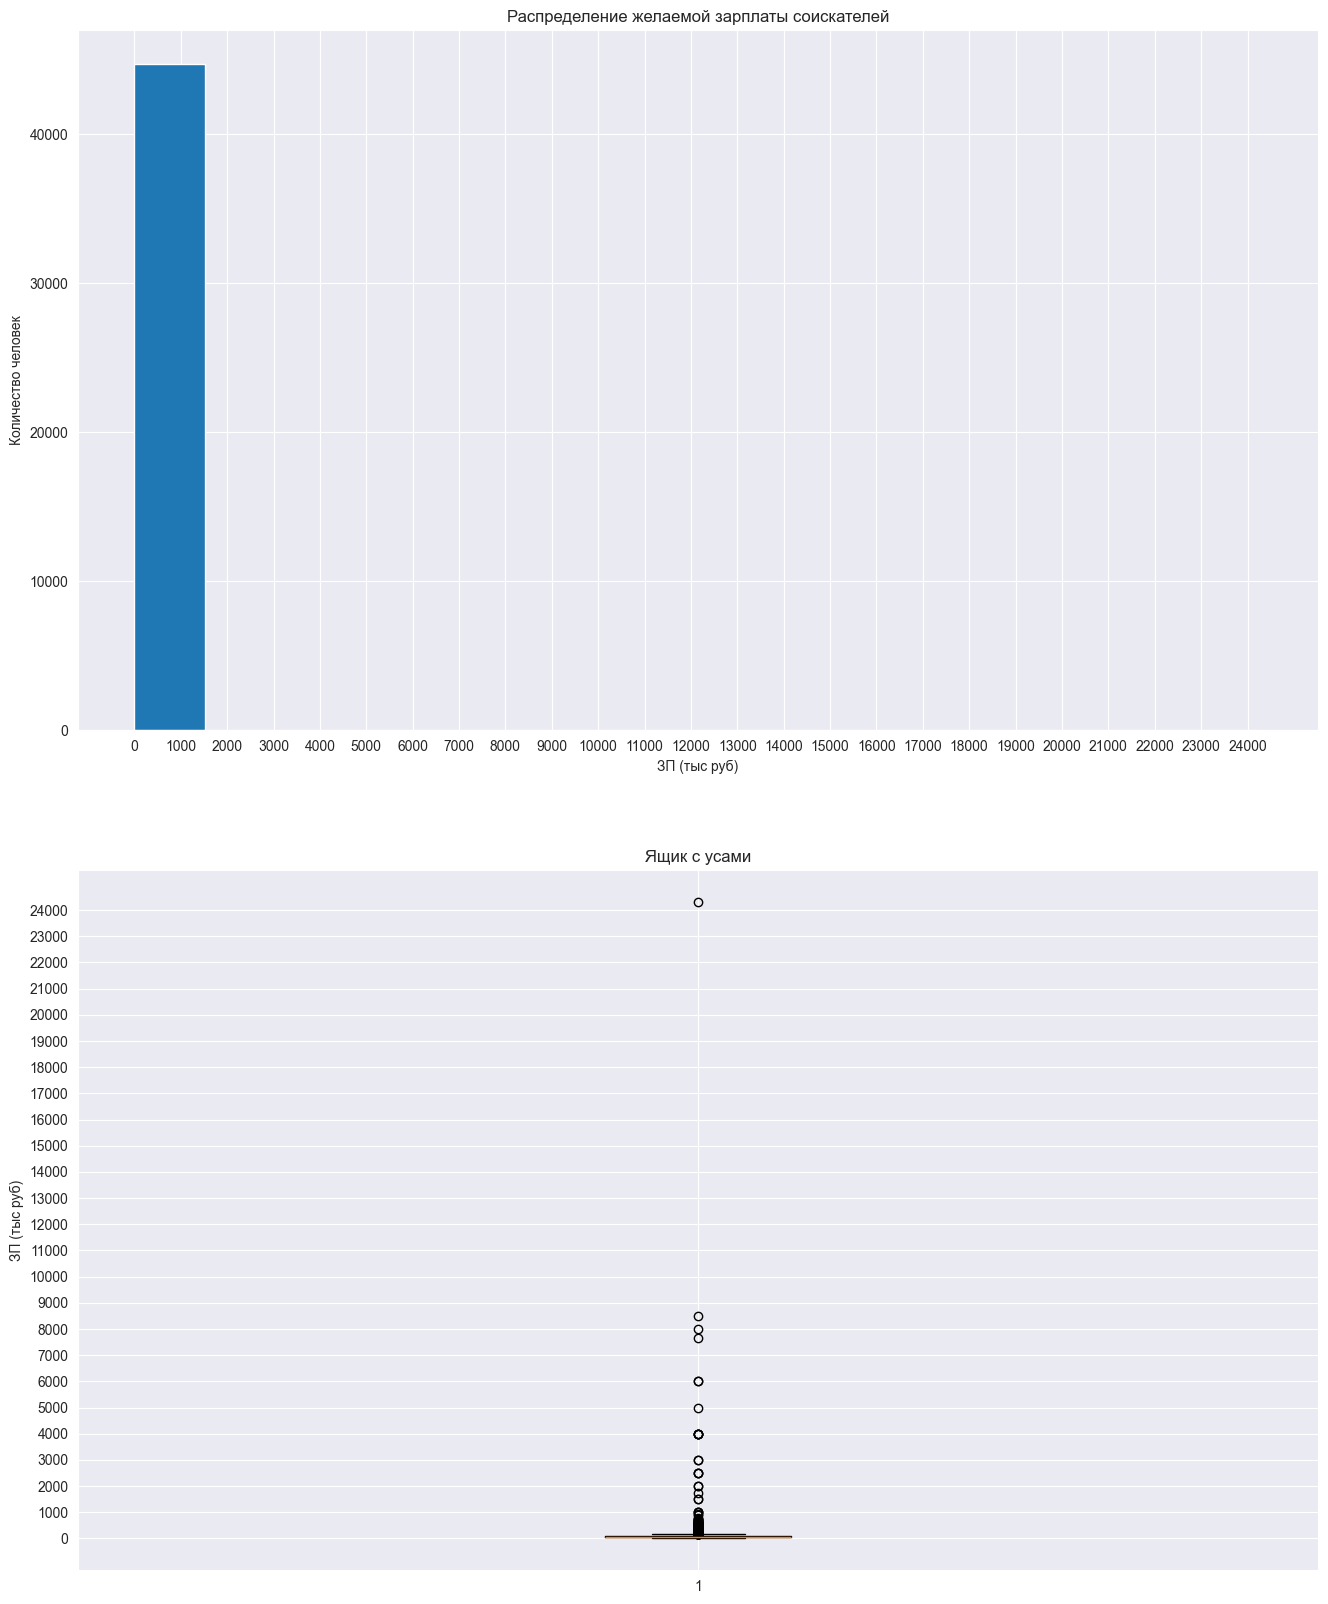

In [80]:
fig2, axs = plt.subplots(2, 1, figsize=(16, 20))

axs[0].hist(hh["ЗП (руб)"]/1000, bins=m)
axs[0].set_title("Распределение желаемой зарплаты соискателей")
axs[0].set_xlabel("ЗП (тыс руб)")
axs[0].set_xticks(np.arange(0, hh["ЗП (руб)"].max()/1000, 1000))
axs[0].set_ylabel("Количество человек")
# axs[0].set_xlim(0, 3000)

axs[1].boxplot(hh["ЗП (руб)"]/1000)
axs[1].set_title("Ящик с усами")
axs[1].set_ylabel("ЗП (тыс руб)")
axs[1].set_yticks(np.arange(0, hh["ЗП (руб)"].max()/1000, 1000))
#axs[1].set_ylim(1000)

plt.show()

График ящика с усами почти неинформативный из-за дальности некоторых выбросов. Поэтому, чтобы нормально проанализировать, обрежем датасет по правилу о статистически значимой выборке - от $Q_1-1,5*(Q_3-Q_1)$ до $Q_3+1,5*(Q_3-Q_1)$.

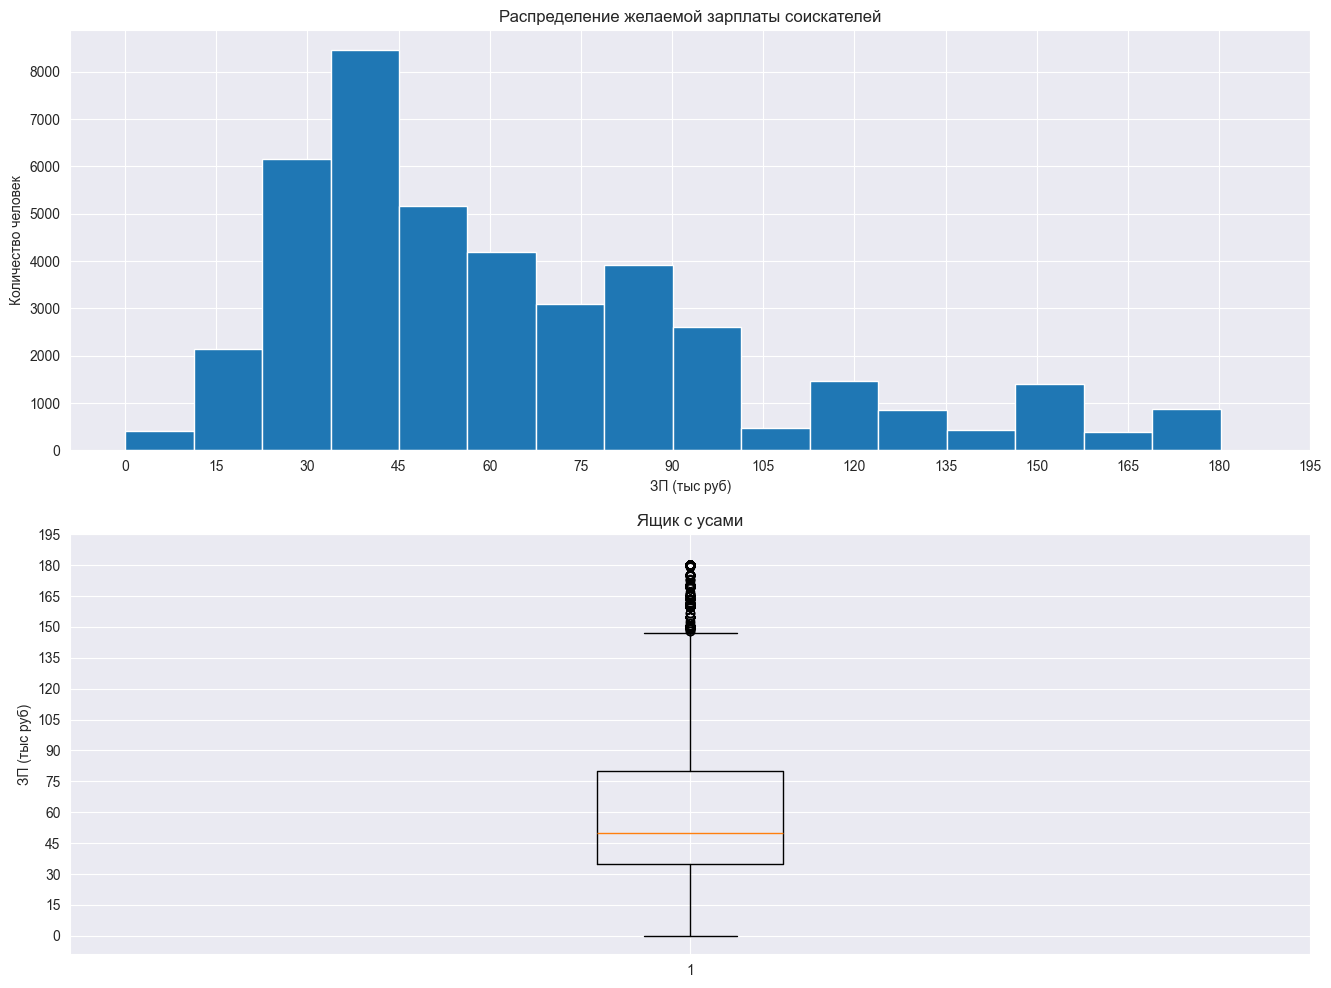

In [81]:
fig3, axs = plt.subplots(2, 1, figsize=(16, 12))

q1 = hh["ЗП (руб)"].quantile(0.25)
q3 = hh["ЗП (руб)"].quantile(0.75)
salary = hh["ЗП (руб)"].loc[(hh["ЗП (руб)"] < q3 + 1.5 * (q3-q1)) & (hh["ЗП (руб)"] > q1 - 1.5 * (q3-q1))] /1000

m = round(1 + math.log(len(salary), 2))  # Определение числа бинов по формуле Стерджеса

axs[0].hist(salary, bins=m)
axs[0].set_title("Распределение желаемой зарплаты соискателей")
axs[0].set_xlabel("ЗП (тыс руб)")
axs[0].set_ylabel("Количество человек")
axs[0].set_xticks(np.arange(0, 200, 15))

axs[1].boxplot(salary)
axs[1].set_title("Ящик с усами")
axs[1].set_ylabel("ЗП (тыс руб)")
axs[1].set_yticks(np.arange(0, 200, 15))

plt.show()

Предельные значения определяются размахом от $Q_1-1,5*(Q_3-Q_1)$ до $Q_3+1,5*(Q_3-Q_1)$, на графике это границы "усов" ящика, то есть от 0 до 150 тыс. руб., следовательно, всё, что лежит за границами, является выбросами (аномальными значениями). По гистограмме видно, что желаемая зарплата большинства соискателей определяется от 30 до 60 тыс. руб.  Распределение не похоже на нормальное. Выбросы остались...

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

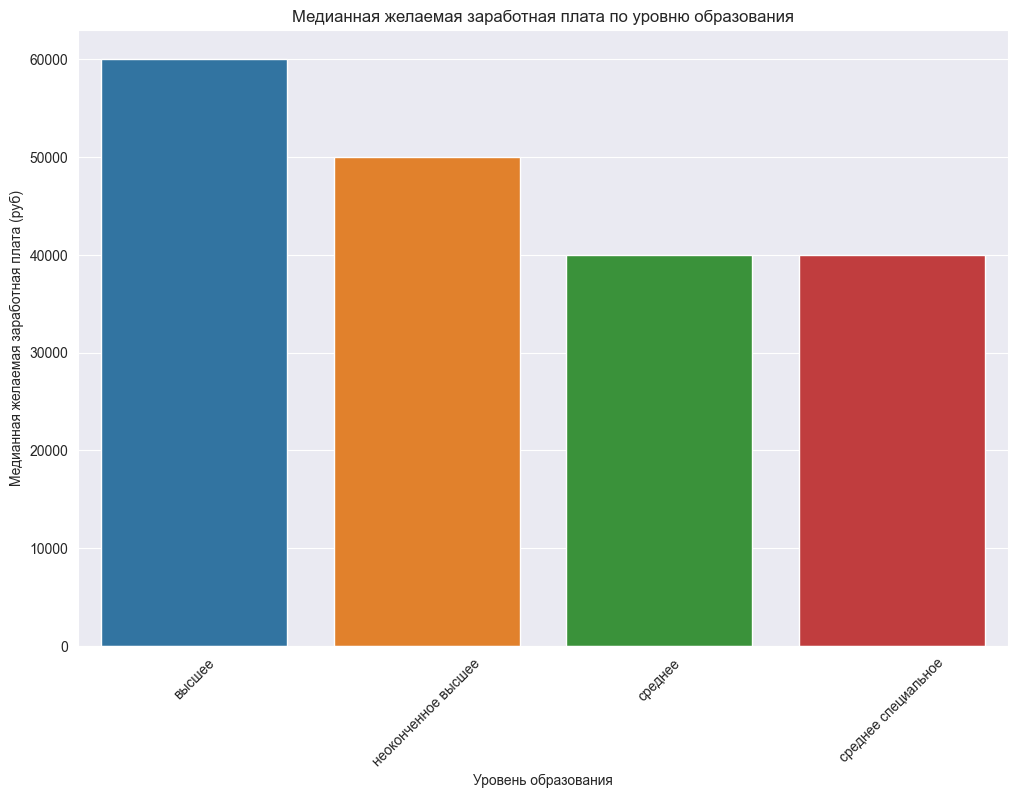

In [82]:
hh_med = hh.loc[hh["ЗП (руб)"] < 1000000]
med_salary_graduate = hh_med.groupby("Образование")["ЗП (руб)"].median().reset_index() # Новый датафрейм с группами по образованию медианой желаемой зарплаты в группе

plt.figure(figsize=(12, 8))
sns.barplot(data=med_salary_graduate, x="Образование", y="ЗП (руб)", hue=med_salary_graduate["Образование"])
plt.title("Медианная желаемая заработная плата по уровню образования")
plt.xlabel("Уровень образования")
plt.ylabel("Медианная желаемая заработная плата (руб)")
plt.xticks(rotation=45)
plt.show()

Наибольшая желаемая медианная ЗП у людей с высшим образованием, у соискателей со средним и средним профессиональным образованием наименьшая медианная ЗП. Думаю, что образование - важный признак при прогнозировании ЗП, так как это разные уровни знаний и разные умения. Сам факт наличия законченного образования уже говорит об умении, как говориться, "вертеться".

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

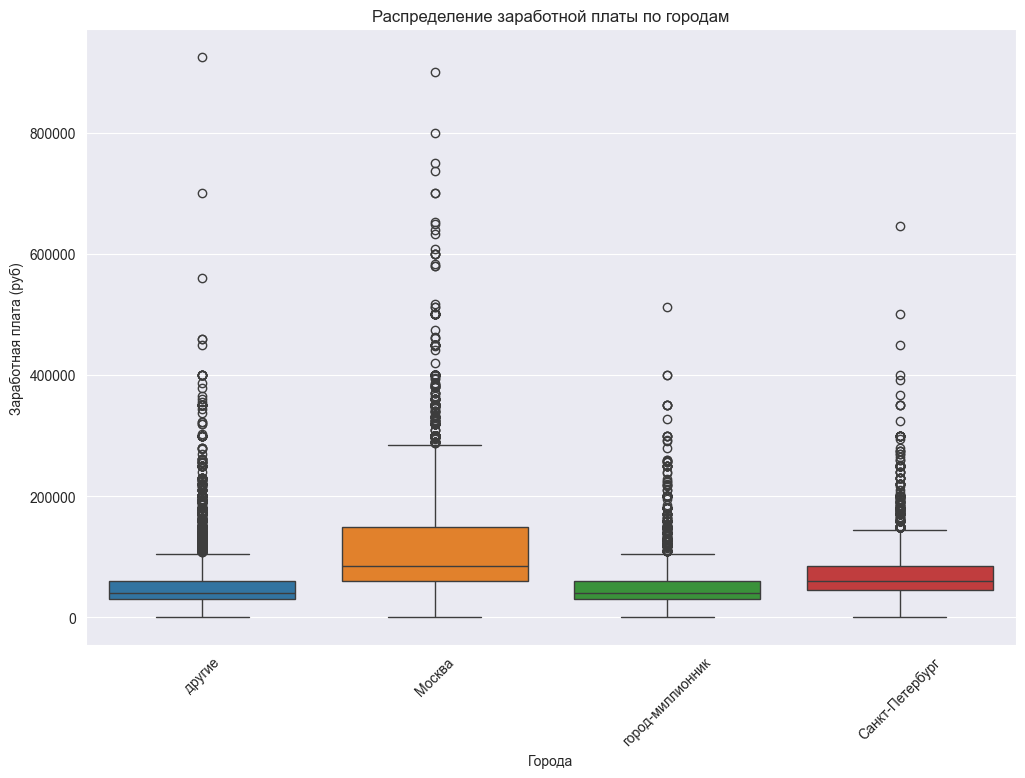

In [83]:
salary_town = hh_med[["Город", "ЗП (руб)"]]

plt.figure(figsize=(12, 8))
sns.boxplot(
    x="Город",
    y="ЗП (руб)",
    data=salary_town,
    hue=salary_town["Город"],
)
plt.title('Распределение заработной платы по городам')
plt.xlabel("Городa")
plt.ylabel("Заработная плата (руб)")
plt.xticks(rotation=45)
plt.show()

Много на графике выбросов. Самый большой выброс находится в категории "другие". Наибольшая желаемая медианная ЗП у людей, живущих в Москве, на втором месте Санкт-Петербург. Размах сильно отличается, самый большой размах в Москве, размах возможных желаемых зарплат соответствует масштабу города. Думаю, что город тоже является важным признаком при прогнозировании ЗП, так как в городах разные уровни жизни, цены, что подразумевает разный уровень заработка для обычной жизни, а не выживания.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

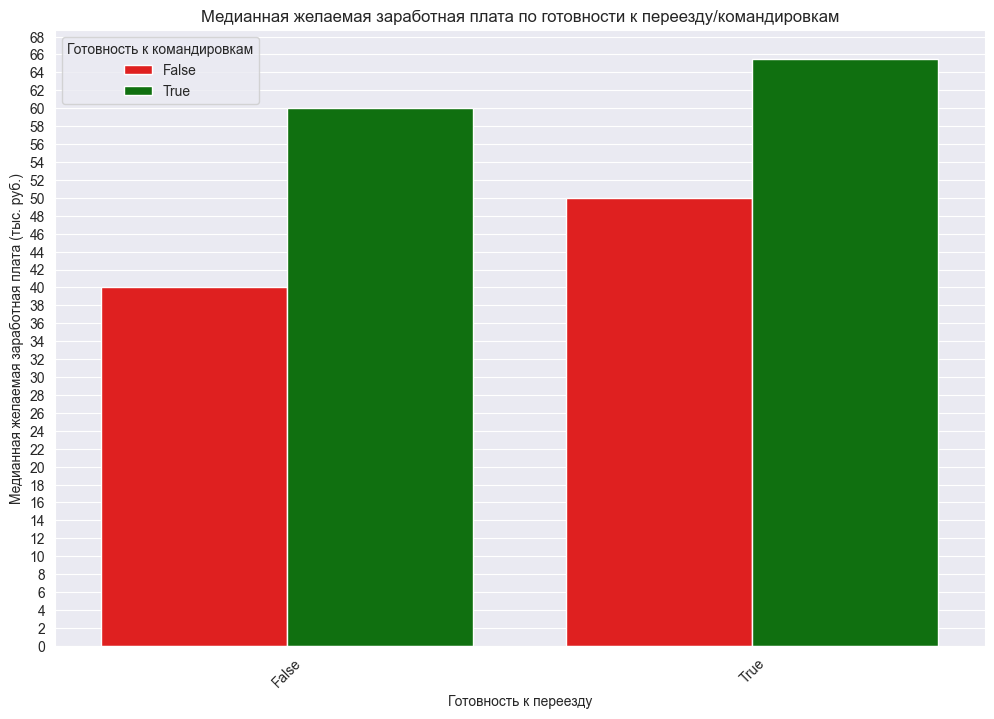

In [84]:
med_salary_moving_trips = hh_med.groupby([
    "Готовность к переезду",
    "Готовность к командировкам"
])["ЗП (руб)"].median().reset_index()

med_salary_moving_trips["ЗП (руб)"] = med_salary_moving_trips["ЗП (руб)"] / 1000

plt.figure(figsize=(12, 8))

sns.barplot(
    data=med_salary_moving_trips,
    x="Готовность к переезду",
    y="ЗП (руб)",
    hue=med_salary_moving_trips["Готовность к командировкам"],
    palette={True: "green", False: "red"}
)

plt.title("Медианная желаемая заработная плата по готовности к переезду/командировкам")
plt.xlabel("Готовность к переезду")
plt.ylabel("Медианная желаемая заработная плата (тыс. руб.)")
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 70, 2))
plt.legend(title="Готовность к командировкам")
plt.show()

Самый высокий медианный уровень заработной платы у готовых к переезду и к командировкам, так как это всё влечёт за собой большие траты, на втором месте люди неготовые к переезду, но готовые к командировкам. На третьем месте готовые к переезду, но неготовые к командировкам. На последнем месте неготовые ни к переезду, ни к командировкам.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

Образование     высшее  неоконченное высшее  среднее  среднее специальное
Возраст                                                                  
14            60.00000                  NaN      NaN                  NaN
15                 NaN                  NaN     10.0                2.000
16           122.58249                  NaN      NaN               30.000
17            90.07550                 80.0     44.0               25.000
18            30.00000                 25.0     35.0               25.151


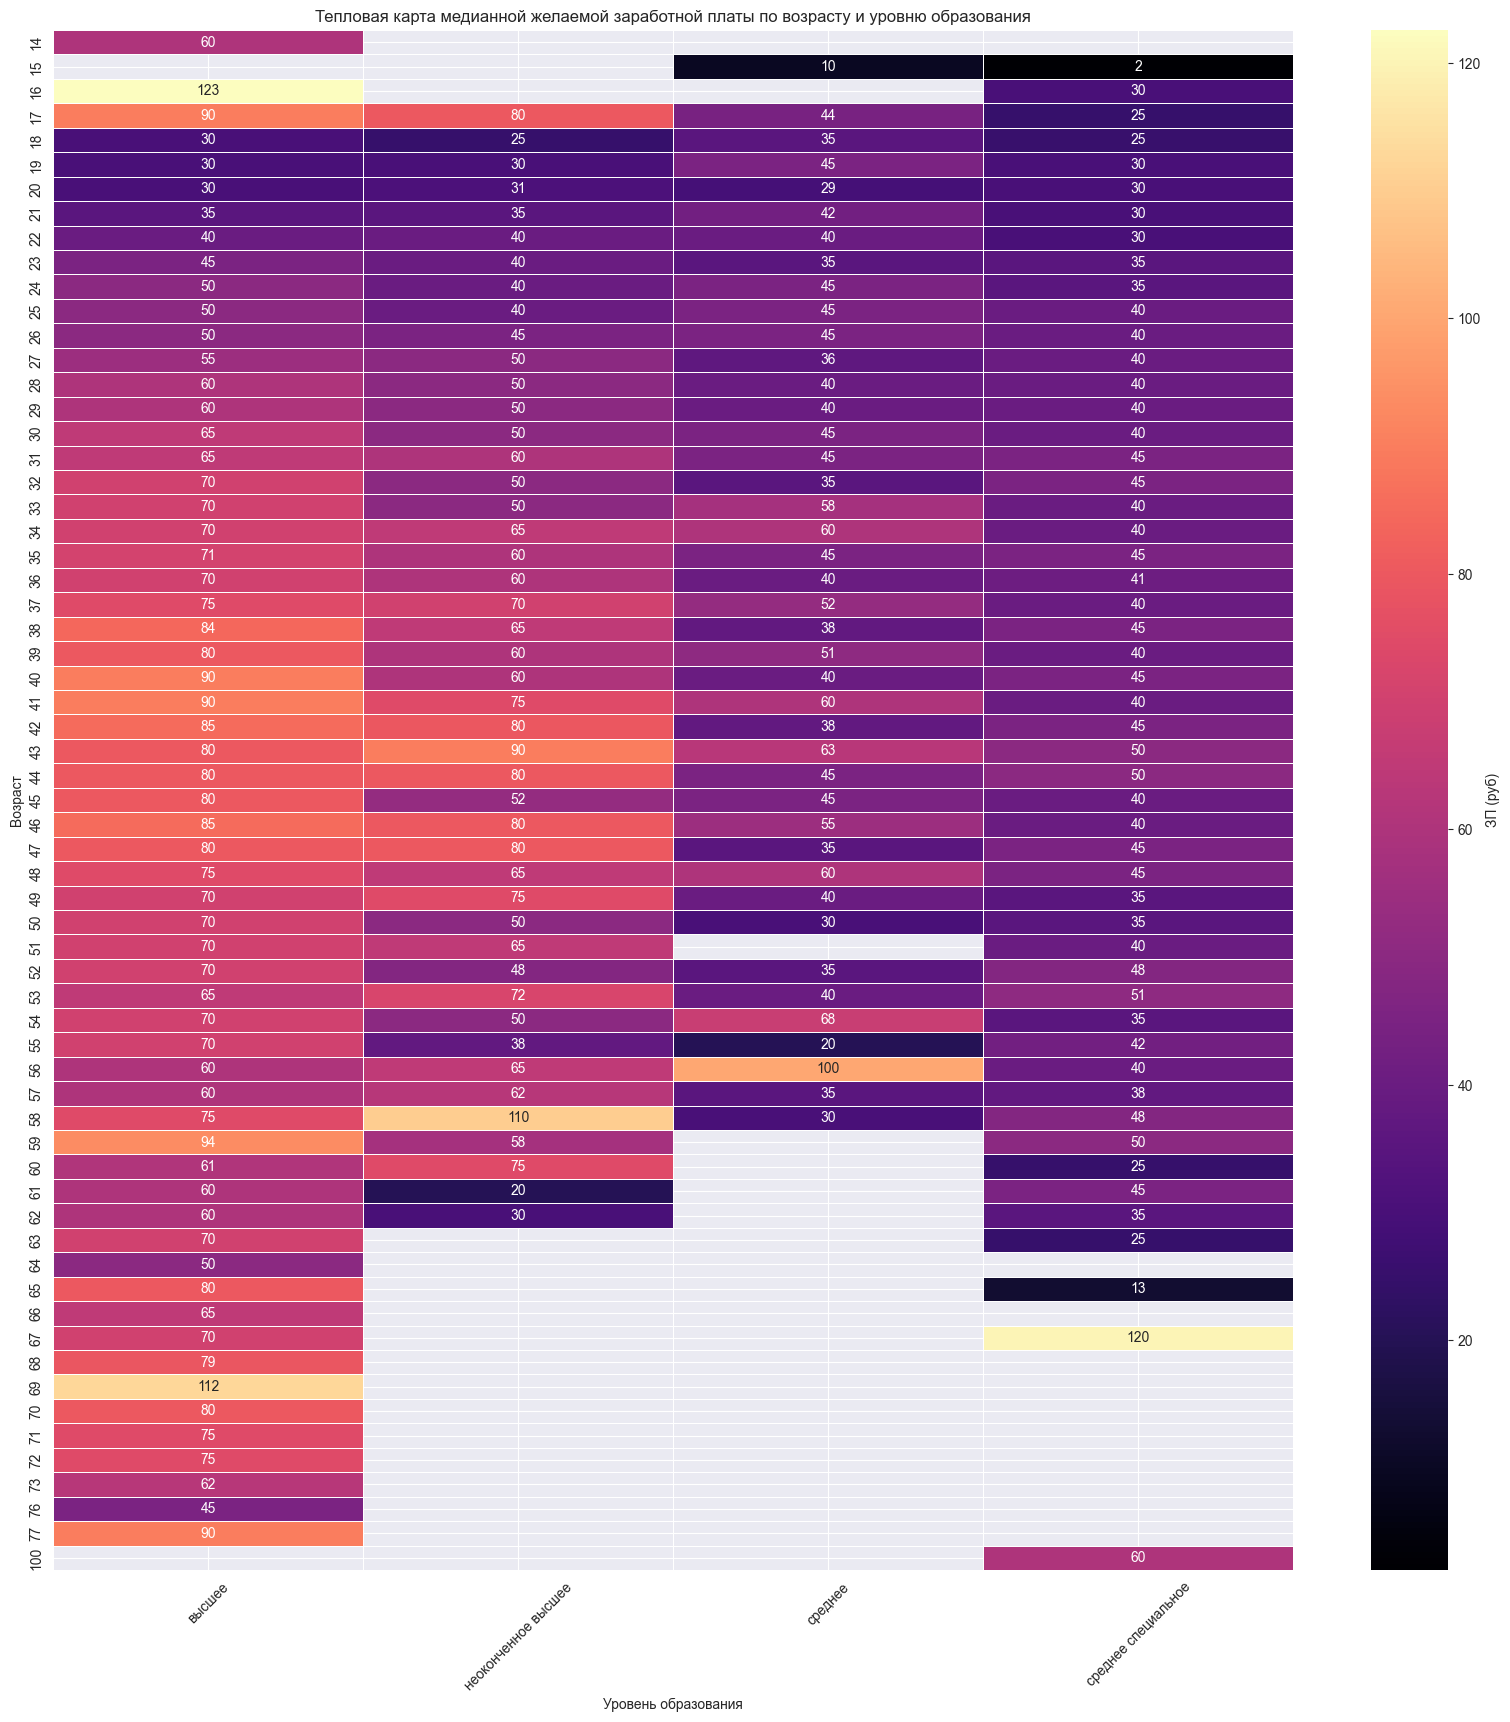

In [85]:
med_salary_graduate_age = pd.pivot_table(
    hh,
    values="ЗП (руб)",
    index= "Возраст",
    columns="Образование",
    aggfunc="median"
)
med_salary_graduate_age = med_salary_graduate_age/ 1000
print(med_salary_graduate_age.head())

plt.figure(figsize=(20, 20))

sns.heatmap(
    med_salary_graduate_age,
    cmap="magma",
    annot=True,
    fmt=".0f",
    linewidths=.5,
    cbar_kws={"label": "ЗП (руб)"}
)

plt.title("Тепловая карта медианной желаемой заработной платы по возрасту и уровню образования")
plt.xlabel("Уровень образования")
plt.ylabel("Возраст")
plt.xticks(rotation=45)
plt.show()

На тепловой карте присутствуют пустоты, так как нет данных в некоторых группах. Выделяется сильно группа соискателей, которым 16 лет с высшим образованием с медианной зарплатой в 123 тыс. руб., 14-летняя группа соискателей с высшим образованием с медианной зарплатой в 60 тыс. руб., кажется, это нереально. Возможно, такая аномалия связана с опечатками или некорректными данными в датасете. Также видно, некоторые группы соискателей с завышенными требованиями к зарплате (среднее специальное образование, 67 лет; неоконченное высшее, 57 лет; среднее, 56 лет)

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

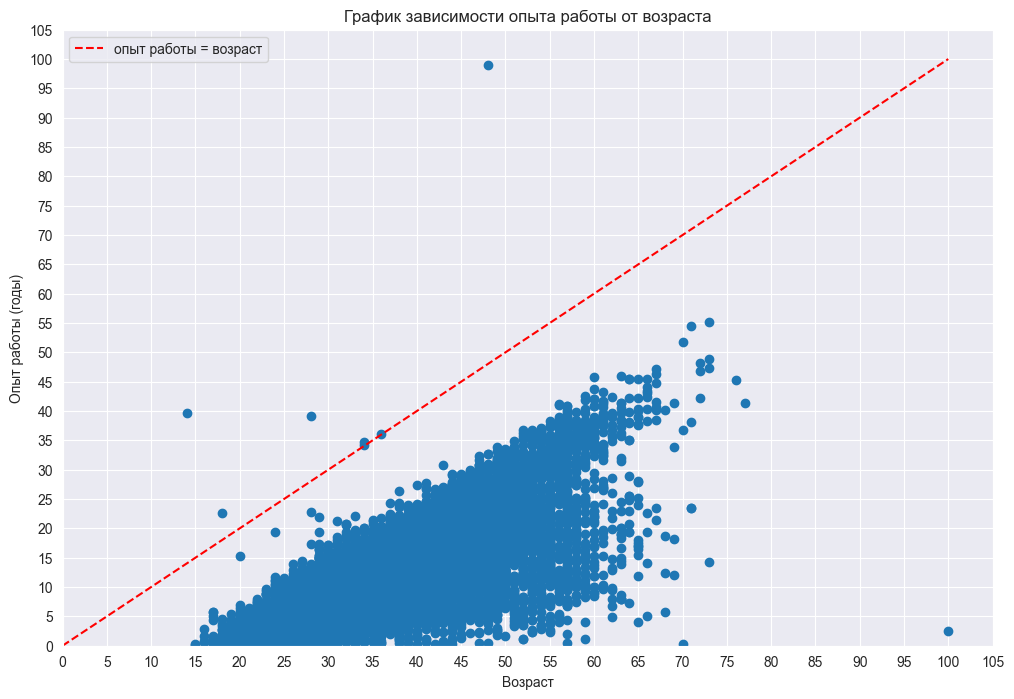

In [86]:
age_experience = hh.loc[:, ["Опыт работы (месяц)", "Возраст"]]
age_experience["Опыт работы (годы)"] = age_experience["Опыт работы (месяц)"] / 12

plt.figure(figsize=(12, 8))

plt.scatter(
    x=age_experience["Возраст"],
    y=age_experience["Опыт работы (годы)"]
)
plt.plot(
    [0, 100],
    [0, 100],
    color="red",
    linestyle="--",
    label="опыт работы = возраст"
)

plt.title("График зависимости опыта работы от возраста")
plt.xlabel("Возраст")
plt.ylabel("Опыт работы (годы)")
plt.xticks(np.arange(0, 120, 5))
plt.yticks(np.arange(0, 120, 5))
plt.xlim(0, 105)
plt.ylim(0, 105)
plt.legend()
plt.show()

На графике видно, что у большинства соискателей опыт работы меньше их возраста, что является логичным, но и присутствуют аномальные значения, где опыт работы сильно превышает возраст. Возможно, это связано с некорректным заполнением анкет.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


Следующий график, который следует рассмотреть, круговая диаграмма уровней образования.

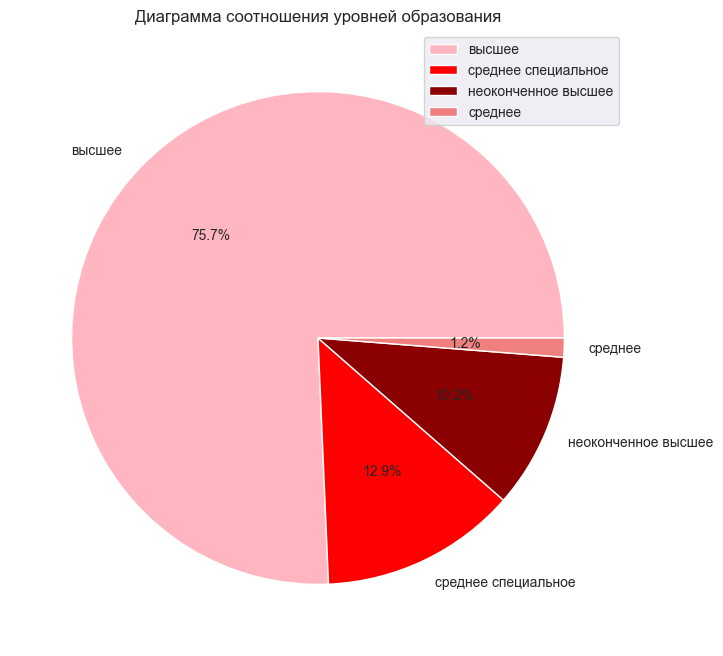

In [87]:
graduate = hh["Образование"].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(
    graduate,
    labels=graduate.index,
    autopct='%1.1f%%',
    colors=["lightpink", "red", "darkred", "lightcoral"]
)

plt.title("Диаграмма соотношения уровней образования")
plt.legend()
plt.show()

Наибольшая доля соискателей имеет высшее образование, следовательно, большинство соискателей завершили высшее образование, что может свидетельствовать о высоком уровне квалификации.

Очень хорошая идея проследить зависимость желаемой ЗП от опыта работы соискателя.

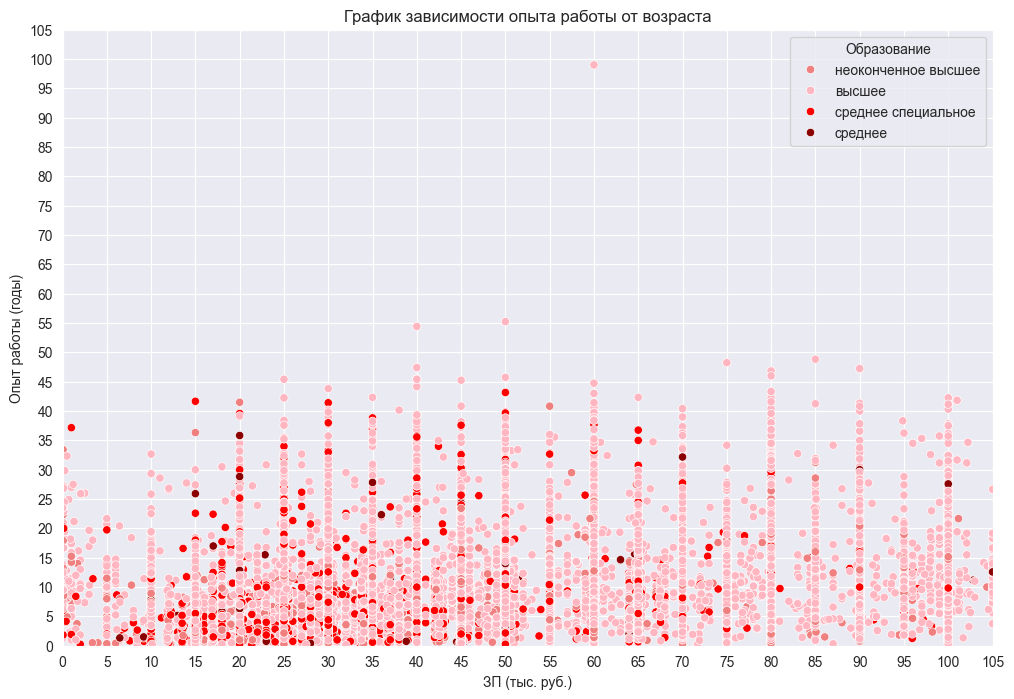

In [88]:
salary_experience = hh.loc[:, ["Опыт работы (месяц)", "ЗП (руб)", "Образование"]]
salary_experience["Опыт работы (годы)"] = salary_experience["Опыт работы (месяц)"] / 12
salary_experience["ЗП (тыс. руб.)"] = salary_experience["ЗП (руб)"] / 1000

graduate = {
    "высшее":"lightpink",
    "неоконченное высшее":"lightcoral",
    "среднее":"darkred",
    "среднее специальное":"red"
}

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=salary_experience,
    x="ЗП (тыс. руб.)",
    y="Опыт работы (годы)",
    hue="Образование",
    palette=graduate
)

plt.title("График зависимости опыта работы от возраста")
plt.xlabel("ЗП (тыс. руб.)")
plt.ylabel("Опыт работы (годы)")
plt.xticks(np.arange(0, 120, 5))
plt.yticks(np.arange(0, 120, 5))
plt.xlim(0, 105)
plt.ylim(0, 105)
plt.show()

На диаграмме видна широкая вариация опыта работы среди различных уровней заработной платы. Большая часть датасета имеет высшее образование, соискатели с таким уровнем зарплаты согласны работать за любую зарплату и имеют разный опыты работы. При более детальном анализе, видно, что наибольшая часть соискателей со среднем специальным образованием концентрируется в области опыта работы от 0 до 15 лет и в области размера зарплаты от 10 до 50 тыс. руб. Нет четкой линейной зависимости между опытом работы и заработной платой: несмотря на увеличение опыта, заработная плата может варьироваться.

Следующие 2 графика будут показывать готовность к командировкам, переезду по полу.

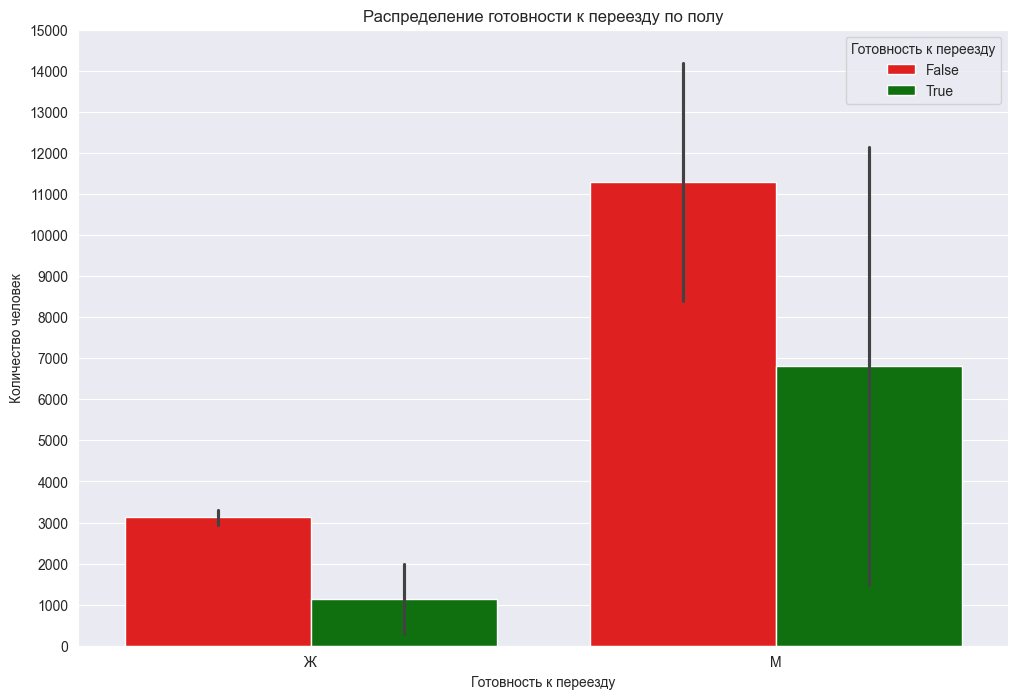

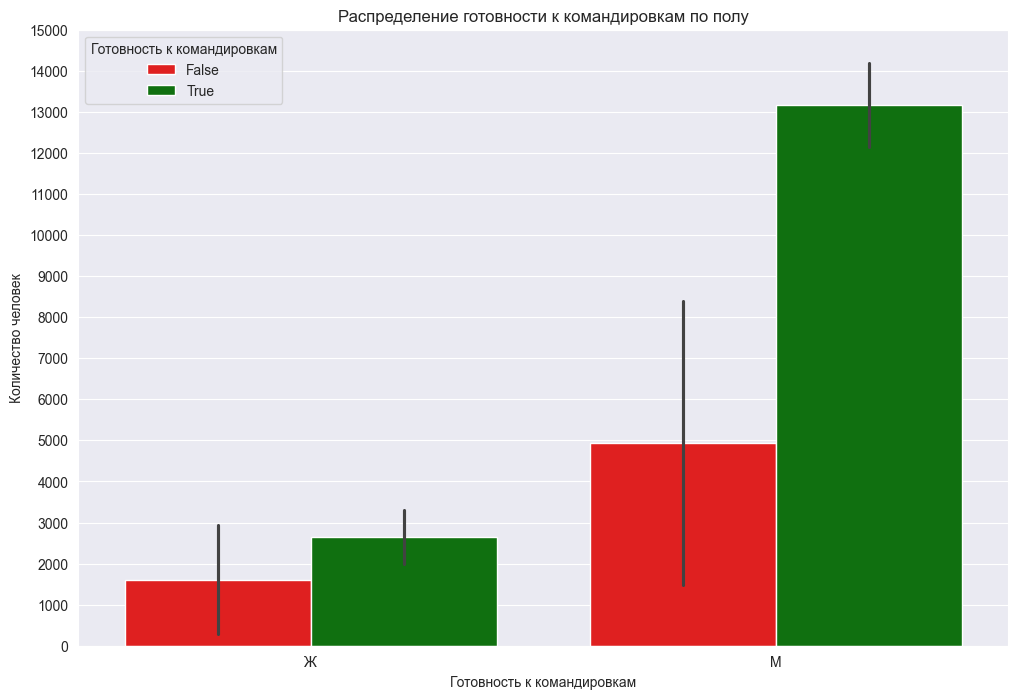

In [89]:
count_moving_trips = hh.groupby([
    "Пол",
    "Готовность к переезду",
    "Готовность к командировкам"
])["ЗП (руб)"].count().reset_index()

plt.figure(figsize=(12, 8))

sns.barplot(
    data=count_moving_trips,
    x="Пол",
    y="ЗП (руб)",
    hue=count_moving_trips["Готовность к переезду"],
    palette={True: "green", False: "red"}
)

plt.title("Распределение готовности к переезду по полу")
plt.xlabel("Готовность к переезду")
plt.ylabel("Количество человек")
plt.yticks(np.arange(0, 16000, 1000))
plt.legend(title="Готовность к переезду")
plt.show()

plt.figure(figsize=(12, 8))

sns.barplot(
    data=count_moving_trips,
    x="Пол",
    y="ЗП (руб)",
    hue=count_moving_trips["Готовность к командировкам"],
    palette={True: "green", False: "red"}
)

plt.title("Распределение готовности к командировкам по полу")
plt.xlabel("Готовность к командировкам")
plt.ylabel("Количество человек")
plt.yticks(np.arange(0, 16000, 1000))
plt.legend(title="Готовность к командировкам")
plt.show()

Чаще всего к командировкам готовы мужчины, но также они чаще не готовы к переезду. У женщин такая же динамика. Также видно, что в датасете больше всего мужчин.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их.

In [92]:
hh.duplicated().sum()# Проверка на наличие дубликатов
hh.drop_duplicates(inplace=True)

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [93]:
print(hh.isna().sum())# Проверка пропусков

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
Полная занятость                     0
Частичная занятость                  0
Проектная работа                     0
Стажировка                           0
Волонтерство                         0
Полный день                          0
Сменный график                       0
Гибкий график                        0
Удаленная работа                     0
Вахтовый метод                       0
ЗП (руб)                             0
dtype: int64


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [94]:
hh["Опыт работы (месяц)"] = (hh["Опыт работы (месяц)"]
                             .fillna(
                            hh["Опыт работы (месяц)"].median()
                            ))
hh.dropna(axis=0,
          inplace=True)
print(hh.isna().sum())# Проверка пропусков

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [120]:
hh_clear = hh[(hh["ЗП (руб)"] > 1000) & (hh["ЗП (руб)"] < 1000000)]

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [121]:
hh_clear = hh_clear[hh_clear["Возраст"] > hh_clear["Опыт работы (месяц)"] / 12]

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

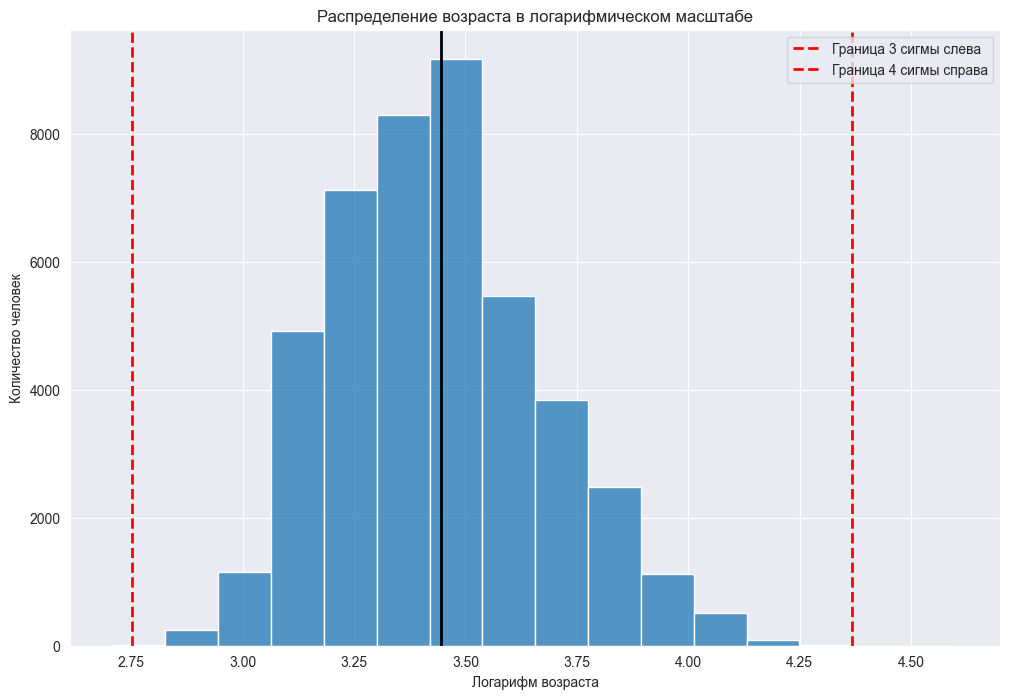

Выбросы:
        Возраст         z
31137       15 -3.187183
32950       15 -3.187183
33654      100  5.028044


In [125]:
log_age = np.log(hh_clear["Возраст"])

m = round(1 + math.log(len(log_age), 2)) # Определение числа бинов по формуле Стерджеса

plt.figure(figsize=(12, 8))
histplot = sns.histplot(log_age, bins=m)
histplot.axvline(log_age.mean(), color="k", lw=2)

three_sigma_left = log_age.mean() - 3 * log_age.std()
four_sigma_right = log_age.mean() + 4 * log_age.std()

histplot.axvline(three_sigma_left, color="r", linestyle="--", lw=2, label="Граница 3 сигмы слева")
histplot.axvline(four_sigma_right, color="r", linestyle="--", lw=2, label="Граница 4 сигмы справа")

plt.title("Распределение возраста в логарифмическом масштабе")
plt.xlabel("Логарифм возраста")
plt.ylabel("Количество человек")
plt.legend()
plt.show()

hh_clear["z"] = (np.log(hh_clear["Возраст"]) - log_age.mean()) / log_age.std()

out = hh_clear[(hh_clear["z"] < -3) | (hh_clear["z"] > 4)]
hh_cleaned = hh_clear[(hh_clear["z"] >= -3) & (hh_clear["z"] <= 4)]

print("Выбросы:\n", out[["Возраст", "z"]])

Распределение имеет правую асимметрию, что означает, что хвост распределения вытянут в правую сторону. Z-оценка - это статистический метод для оценки отклонения значения выборки от среднего в единицах стандартного отклонения. Сначала величину выборки стандартизируют, а потом отсекают хвосты за пределами порогов. Порог задаётся самим. От -3 до 4 будут наши пороги для z-оценки, так как отклонения от мат. ожидания мы выбрали от -3 сигм до 4 сигм. К выбросам попали соискатели, кому 15 и 100 лет.
